<a href="https://colab.research.google.com/github/kahram-y/first-repository/blob/master/quest3/kahramyoon_MainQuest03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (r2_score, confusion_matrix, classification_report,
                             precision_recall_fscore_support, roc_auc_score, roc_curve)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [5]:
!pip install kagglehub

In [6]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [10]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [11]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [12]:
# 무작위로 1000개의 표본 추출
sample = df.sample(n=1000, random_state=42)

In [13]:
# 모집단과 표본의 평균 및 표준편차 계산
pop_mean = df['TotalPrice'].mean()
pop_std = df['TotalPrice'].std()
sample_mean = sample['TotalPrice'].mean()
sample_std = sample['TotalPrice'].std()
print("[모집단 (Population)]")
print(f"평균(mean): {pop_mean:.4f}")
print(f"표준편차(std): {pop_std:.4f}\n")
print("[표본 (Sample, n=1000)]")
print(f"평균(mean): {sample_mean:.4f}")
print(f"표준편차(std): {sample_std:.4f}")

[모집단 (Population)]
평균(mean): 17.9878
표준편차(std): 378.8108

[표본 (Sample, n=1000)]
평균(mean): 16.8321
표준편차(std): 64.4673


In [14]:
# 표본평균의 분포 측정
se = pop_std / np.sqrt(len(sample))
print(f"표본평균의 표준오차(SE): {se:.4f}")

표본평균의 표준오차(SE): 11.9791


중심극한정리에 의하면 크기가 충분히 큰 표본(n≥30)에 대하여 표본평균은 대략 정규분포를 따르고, 표본평균과 모집단평균의 차이는 대부분 pop_std / sqrt(n)로 계산된 표본평균의 표준오차(SE) 범위 내에 있습니다.



## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [15]:
# 상위 2개 국가 찾기
top_countries = sample['Country'].value_counts().head(2).index.tolist()
print("주문이 가장 많은 상위 두 국가:", top_countries)

주문이 가장 많은 상위 두 국가: ['United Kingdom', 'EIRE']


In [16]:
# 각 국가의 TotalPrice 데이터 추출
country1 = sample.loc[sample['Country'] == top_countries[0], 'TotalPrice']
country2 = sample.loc[sample['Country'] == top_countries[1], 'TotalPrice']
print(f"[{top_countries[0]}] 표본 개수: {len(country1)}, 평균: {country1.mean():.2f}, 표준편차: {country1.std():.2f}")
print(f"[{top_countries[1]}] 표본 개수: {len(country2)}, 평균: {country2.mean():.2f}, 표준편차: {country2.std():.2f}")

[United Kingdom] 표본 개수: 900, 평균: 16.02, 표준편차: 66.11
[EIRE] 표본 개수: 20, 평균: 23.55, 표준편차: 25.03


In [17]:
# 정규성 확인 (Shapiro-Wilk 주의: 큰 표본에서는 민감)
shapiro1 = stats.shapiro(country1.sample(500, random_state=42) if len(country1) > 500 else country1)
shapiro2 = stats.shapiro(country2)

if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05:
    print("→ 정규성 가정: 충족")
else:
    print("→ 적어도 한 집단은 정규성을 만족하지 않습니다. (정규분포 가정이 약함)")

→ 적어도 한 집단은 정규성을 만족하지 않습니다. (정규분포 가정이 약함)


In [18]:
# Levene 등분산 검정
levene_stat, levene_p = stats.levene(country1, country2, center='mean')

if levene_p > 0.05:
    print("→ 등분산 가정: 충족")
else:
    print("→ 불충족 (Welch t-test 사용)")

→ 등분산 가정: 충족


In [20]:
# 독립표본 t-검정
t_stat, p_val = stats.ttest_ind(country1, country2, equal_var=True, nan_policy='omit')
print(f"독립표본 t-검정: t-통계량 = {t_stat:.4f}, p-값 = {p_val:.4e}")

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각: 두 국가의 평균 TotalPrice는 통계적으로 유의미하게 다릅니다.")
else:
    print("→ 귀무가설 채택: 두 국가의 평균 TotalPrice 차이는 통계적으로 유의미하지 않습니다.")

독립표본 t-검정: t-통계량 = -0.5089, p-값 = 6.1096e-01
→ 귀무가설 채택: 두 국가의 평균 TotalPrice 차이는 통계적으로 유의미하지 않습니다.


t-통계량은 두 집단 평균 차이를 표준오차로 나눈 값으로, |t| 값이 작을수록 두 집단의 차이가 유의하지 않습니다. p-값은 관찰된 차이가 우연히 발생할 확률로, p > α 이면 우연히 보기 쉬운 차이라고 판단하여 귀무가설을 기각하지 않습니다.

2종 오류란 실제로 두 국가의 평균이 다른데, 잘못해서 같다고 판단하는 오류로, 표본 수가 작거나 변동성이 클수록 2종 오류 가능성이 커집니다. 이러한 2종 오류를 줄이기 위해서는 표본 수를 충분히 확보하거나, t-검정을 하기 위한 정규성/등분산 가정이 충족됐는지 확인할 필요가 있습니다.

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [21]:
# 주중 / 주말 구분
sample['IsWeekend'] = sample['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

weekday = sample.loc[sample['IsWeekend'] == 'Weekday', 'UnitPrice']
weekend = sample.loc[sample['IsWeekend'] == 'Weekend', 'UnitPrice']

# 결측치 제거
weekday = weekday.dropna()
weekend = weekend.dropna()

# 기술통계 계산
def summary_stats(s):
    return {
        'count': len(s),
        'mean': np.mean(s),
        'median': np.median(s),
        'std': np.std(s, ddof=1),
        'var': np.var(s, ddof=1),
        'min': np.min(s),
        '25%': np.percentile(s, 25),
        '75%': np.percentile(s, 75),
        'max': np.max(s)
    }

weekday_stats = summary_stats(weekday)
weekend_stats = summary_stats(weekend)

print("주중(UnitPrice) 통계 요약:")
for k, v in weekday_stats.items():
    print(f"{k:<8}: {v:.4f}")

print("\n주말(UnitPrice) 통계 요약:")
for k, v in weekend_stats.items():
    print(f"{k:<8}: {v:.4f}")

주중(UnitPrice) 통계 요약:
count   : 898.0000
mean    : 3.6908
median  : 2.0800
std     : 8.7972
var     : 77.3914
min     : 0.0000
25%     : 1.2500
75%     : 4.1300
max     : 222.7500

주말(UnitPrice) 통계 요약:
count   : 102.0000
mean    : 2.7128
median  : 1.6500
std     : 2.7753
var     : 7.7021
min     : 0.2900
25%     : 1.2500
75%     : 3.2500
max     : 18.0000


/tmp/ipython-input-549341064.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsWeekend', y='UnitPrice', data=sample, palette='Set2')


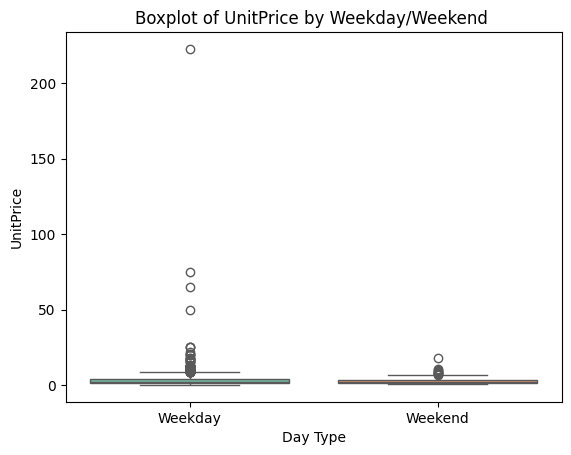

In [22]:
# 상자수염그림 (Boxplot)
plt.figure()
sns.boxplot(x='IsWeekend', y='UnitPrice', data=sample, palette='Set2')
plt.title("Boxplot of UnitPrice by Weekday/Weekend ")
plt.ylabel("UnitPrice")
plt.xlabel("Day Type")
plt.show()

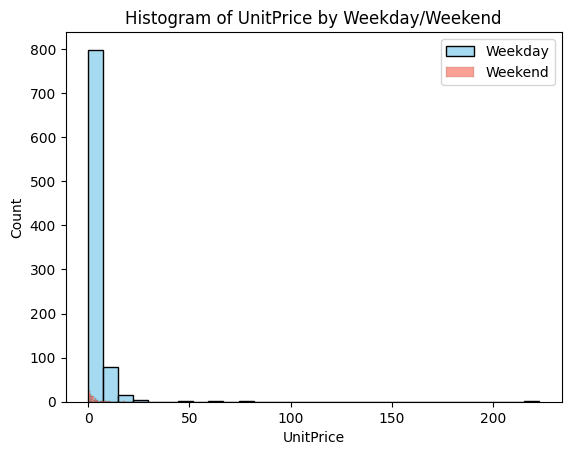

In [24]:
# 히스토그램 시각화
plt.figure()
sns.histplot(weekday, color='skyblue', label='Weekday', bins=30)
sns.histplot(weekend, color='salmon', label='Weekend', bins=30)
plt.legend()
plt.title("Histogram of UnitPrice by Weekday/Weekend")
plt.xlabel("UnitPrice")
plt.ylabel("Count")
plt.show()

Histogram의 꼬리가 한쪽으로 치우친 것으로 보아, 대부분 저가 상품 위주로 구성되었다는 것을 확인할 수 있습니다. Boxplot에서 주중에 이상치(outlier)가 확인되어 고가 상품이 일부 포함된 것을 확인할 수 있습니다. 요약하자면, UnitPrice는 주중/주말에 따라 큰 차이가 없을 수도 있지만, 특정 패턴(예: 주중에 고가 상품 판매 비중 증가)이 확인됩니다.

추가적으로, 분포 모양을 이상적으로 시각화하기 위해서는 UnitPrice와 같은 컬럼이 큰 영향을 주지 않도록 스케일링 작업을 해볼 수 있습니다.

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [25]:
# 다중 선형 회귀: Quantity 예측
# 필요한 데이터 선택
cols = ['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']

# 결측치 제거
df = sample[cols].dropna().copy()

# 이상치 제거
# Quantity와 UnitPrice의 0 이하의 값 제거
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Quantity와 UnitPrice의 극단값(상위 99%) 제거
q_low = df['Quantity'].quantile(0.01)
q_high = df['Quantity'].quantile(0.99)
p_low = df['UnitPrice'].quantile(0.01)
p_high = df['UnitPrice'].quantile(0.99)

df = df[
    (df['Quantity'].between(q_low, q_high)) &
    (df['UnitPrice'].between(p_low, p_high))
]

print(f"전처리 완료: {len(df)}개 샘플 남음")


# 범주형 변수 원-핫 인코딩
df_encoded = pd.get_dummies(df, columns=['Country', 'DayOfWeek', 'InvoiceMonth'], drop_first=True)

# 종속변수(y), 독립변수(X) 설정
X = df_encoded.drop('Quantity', axis=1)
y = df_encoded['Quantity']

# 학습/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링 (UnitPrice가 큰 영향을 주지 않도록)
# ss = StandardScaler()
# X_train['UnitPrice'] = ss.fit_transform(X_train[['UnitPrice']])
# X_test['UnitPrice'] = ss.transform(X_test[['UnitPrice']])

# 회귀 모델 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측 및 성능평가
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('\n선형회귀 결정계수: {:.4f}'.format(r2))

# 회귀계수 출력
coef_df = pd.DataFrame({'feature': X_train.columns, 'coef': lr.coef_}).sort_values(by='coef', ascending=False)
print("\n회귀계수 (상위 영향 변수)")
print(coef_df.head(10))
print("\n회귀계수 (하위 영향 변수)")
print(coef_df.tail(10))


전처리 완료: 945개 샘플 남음

선형회귀 결정계수: 0.0889

회귀계수 (상위 영향 변수)
                    feature       coef
12      Country_Netherlands  26.479629
18           Country_Sweden  25.917221
11            Country_Italy  23.512610
15         Country_Portugal  12.479674
1           Country_Austria  11.824987
19      Country_Switzerland  11.352662
4            Country_Canada   9.364970
7              Country_EIRE   9.321092
9            Country_France   9.115733
5   Country_Channel Islands   8.257845

회귀계수 (하위 영향 변수)
            feature      coef
22      DayOfWeek_1 -0.327798
0         UnitPrice -0.887226
37  InvoiceMonth_12 -1.273776
32   InvoiceMonth_7 -1.316539
31   InvoiceMonth_6 -2.017593
30   InvoiceMonth_5 -2.416253
29   InvoiceMonth_4 -2.477401
28   InvoiceMonth_3 -2.737920
35  InvoiceMonth_10 -3.322452
36  InvoiceMonth_11 -3.326992


회귀계수가 양수인 변수는 Quantity를 증가시키고, 음수인 변수는 Quantity를 감소시키는 방향으로 작용합니다. 예를 들어, 특정 국가 더미변수가 양수라면, 그 국가에서 상대적으로 판매 수량이 많다는 뜻입니다.

결정계수(R²)가 0.0889인 것으로 보아 이 다중회귀모델은 판매수량의 변동을 8.89% 설명한다고 해석할 수 있습니다. 판매 수량에 영향을 주는 다른 요인(예: 프로모션, 시즌, 고객유형 등)을 추가하면 모델 성능이 개선될 수 있습니다.

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.


Confusion Matrix (rows: actual, cols: predicted)
 [[194   0]
 [  5   0]]

Classification report:

              precision    recall  f1-score   support

           0     0.9749    1.0000    0.9873       194
           1     0.0000    0.0000    0.0000         5

    accuracy                         0.9749       199
   macro avg     0.4874    0.5000    0.4936       199
weighted avg     0.9504    0.9749    0.9625       199

Precision (IsReturn=1): 0.0000
Recall    (IsReturn=1): 0.0000
F1-score  (IsReturn=1): 0.0000

ROC AUC: 0.9299


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

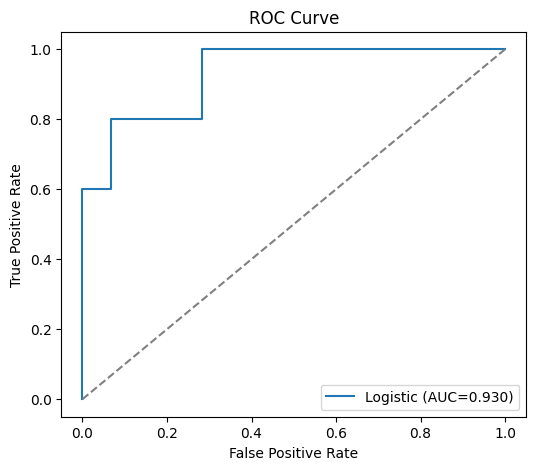

In [26]:
# 로지스틱 회귀: 반품 여부 예측
# 복사본 사용
df = sample.copy()

# IsReturn 피쳐 생성: 0 이하의 Quantity를 반품으로 간주
df['IsReturn'] = (df['Quantity'] <= 0).astype(int)

# 사용할 피쳐 선정
features = ['UnitPrice', 'TotalPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']
required = features + ['IsReturn']
df = df[required].copy()

# 결측치 제거
df = df.dropna()

# 이상치 처리: UnitPrice 음수 제거
df = df[df['UnitPrice'] >= 0]

# 극단값 제거: UnitPrice의 상위 0.5% 컷
up_price_cut = df['UnitPrice'].quantile(0.995)
df = df[df['UnitPrice'] <= up_price_cut]

# 클래스 불균형 확인
# ret_rate = df['IsReturn'].mean()
# print(f"총 샘플 수: {len(df):,}, 반품 비율(IsReturn=1): {ret_rate:.4f}")

# 범주형 변수(Country) 원-핫 인코딩
df_enc = pd.get_dummies(df, columns=['Country'], drop_first=True)

# 독립/종속 설정
X = df_enc.drop(columns=['IsReturn'])
y = df_enc['IsReturn']

# 수치형 칼럼(UnitPrice, TotalPrice) 스케일링
num_cols = ['UnitPrice', 'TotalPrice']
ss = StandardScaler()
X[num_cols] = ss.fit_transform(X[num_cols])

# train/test split (층화 샘플링)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 모델 학습: 로지스틱 회귀
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# 예측
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

# 평가
# 혼동행렬
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (rows: actual, cols: predicted)\n", cm)

print("\nClassification report:\n")
print(classification_report(y_test, y_pred, digits=4))

prec, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label=1)
print(f"Precision (IsReturn=1): {prec:.4f}")
print(f"Recall    (IsReturn=1): {recall:.4f}")
print(f"F1-score  (IsReturn=1): {f1:.4f}")

# ROC-AUC
if len(np.unique(y_test)) > 1:
    auc = roc_auc_score(y_test, y_prob)
    print(f"\nROC AUC: {auc:.4f}")

    # ROC curve 시각화
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'Logistic (AUC={auc:.3f})')
    plt.plot([0,1],[0,1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

혼돈행렬(Confusion Matrix) 표로부터 정확도(accuracy), 정밀도(precision), 재현율(recall), F1-score를 계산합니다.

AUC값은 0.9299로, 전반적으로 분류 성능이 매우 우수하다고 볼 수 있습니다.


**성능 향상 방안**
- 데이터 전처리 개선:
   - 이상치 추가 제거
- 피쳐 엔지니어링:
   - CustomerID: 고객별 과거 반품률(반품 이력)
   - StockCode (상품 코드): 특정 상품에 대한 반품 경향
   - 고객별 누적 구매량, 최근 구매 빈도, 재구매율, 시간대 등 파생변수 추가
- 모델링:
   - 트리 기반 모델 (RandomForest, XGBoost, LightGBM) — 비선형 관계와 범주 중요도 포착에 유리
   - 앙상블 + 하이퍼파라미터 튜닝 (GridSearch / RandomizedSearchCV)
   - 교차검증(CV)으로 안정적 성능 측정


[랜덤포레스트 혼동행렬 (rows: actual, cols: predicted)]
 [[194   0]
 [  1   4]]

[Classification Report - Random Forest]

              precision    recall  f1-score   support

           0     0.9949    1.0000    0.9974       194
           1     1.0000    0.8000    0.8889         5

    accuracy                         0.9950       199
   macro avg     0.9974    0.9000    0.9432       199
weighted avg     0.9950    0.9950    0.9947       199

Precision (IsReturn=1): 1.0000
Recall    (IsReturn=1): 0.8000
F1-score  (IsReturn=1): 0.8889

ROC AUC (RandomForest): 1.0000


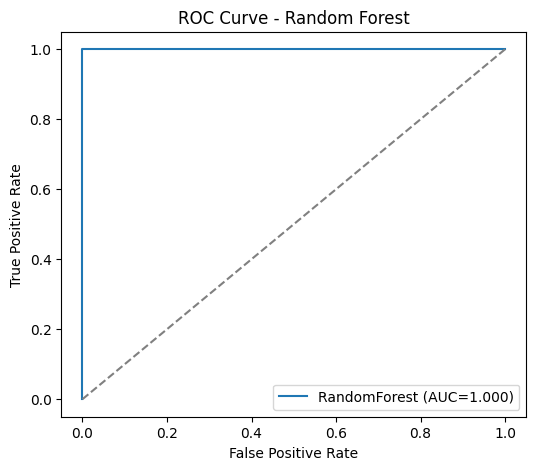

In [27]:
# 비선형 관계를 포착할 수 있는 랜덤포레스트 적용
# 랜덤포레스트 모델 정의 및 학습
rf = RandomForestClassifier(
    n_estimators=200,        # 트리 개수
    max_depth=10,            # 트리 최대 깊이 (과적합 방지)
    random_state=42,
    class_weight='balanced'  # 반품 데이터 불균형 시 유용
)

rf.fit(X_train, y_train)

# 예측 및 확률 계산
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # ROC-AUC용

# 혼동행렬 및 주요 평가지표
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\n[랜덤포레스트 혼동행렬 (rows: actual, cols: predicted)]\n", cm_rf)

print("\n[Classification Report - Random Forest]\n")
print(classification_report(y_test, y_pred_rf, digits=4))

# Precision, Recall, F1-score (직접 출력)
prec, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='binary', pos_label=1)
print(f"Precision (IsReturn=1): {prec:.4f}")
print(f"Recall    (IsReturn=1): {recall:.4f}")
print(f"F1-score  (IsReturn=1): {f1:.4f}")

# ROC-AUC 및 곡선 시각화
if len(np.unique(y_test)) > 1:
    auc_rf = roc_auc_score(y_test, y_prob_rf)
    print(f"\nROC AUC (RandomForest): {auc_rf:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'RandomForest (AUC={auc_rf:.3f})')
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Random Forest')
    plt.legend()
    plt.show()


F1-score, Recall, ROC-AUC가 로지스틱 회귀보다 상승했습니다.